# **Project Name** -  AirBnb Booking Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Pranay Kuthe
##### **Team Member 2 -** Vipil Khapre


# **GitHub Link -**

# **Problem Statement**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Dataset Loading

In [ ]:
# Loading and importing Dataset
air = pd.read_csv('/content/gdrive/MyDrive/Datasets/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset first
air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns 
air.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset info
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(air[air.duplicated()])

0

#### Dropping the columns

In [ ]:
# Drroping unwanted columns -> As latitude and longitude does not affect the existing dataset                 
air.drop(air.columns[[6,7]], axis=1, inplace=True)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
air.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:>

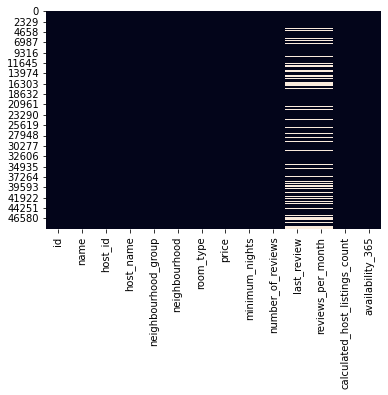

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(air.isnull(), cbar=False)

### What did you know about your dataset?
The AirBnb dataset, which we used for our exploratory data analysis and The dataset contains information on over 49,000 listings in New York City for the year 2019. The dataset includes information such as the name of the listing, the host's name, the neighborhood, the room type, the price, the number of reviews, and more.

This dataset is a valuable resource for analyzing the behavior of guests and hosts on the AirBnb platform and has been used in numerous studies and analyses. By using this dataset, we were able to gain insights into the world of AirBnb and the behavior of its users, informing our analysis and providing valuable insights into the hospitality industry.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

#### Description of variables of the dataframe

In [ ]:
# Dataset Describe
air.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

•	**id** : Unique ID

•	**name** : Name of the listing

•	**host_id** : Unique host_id

•	**host_name** : Name of the host

•	**neighbourhood_group** : location

•	**neighborhood** : area

•	**latitude** : Latitude range

•	**longitude** : Longitude range

•	**room_type** : Type of listing

•	**price** : Price of listing

•	**minimum_nights** : Minimum nights to be paid for

•	**number_of_reviews** : Number of reviews

•	**last_review** : Content of the last review

•	**reviews_per_month** : Number of checks 
per month

•	**calculated_host_listing_count** : Total count

•	**availability_365** : Availability around the year





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in air.columns.tolist():
  print("No. of unique values in ",i,"is",air[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## 3. ***Data Wrangling***


In [ ]:
air.shape

(48895, 14)

In [ ]:
# Drop the columns like name and host_name
air.dropna(subset=['name','host_name'],inplace=True)

In [ ]:
#checking changes
air.shape

(48858, 14)

In [ ]:
air.fillna({'reviews_per_month':0},inplace=True)
air.isna().sum()
# Null Values exist in only last reviews column

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
air.shape

(48858, 14)

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   room_type                       48858 non-null  object 
 7   price                           48858 non-null  int64  
 8   minimum_nights                  48858 non-null  int64  
 9   number_of_reviews               48858 non-null  int64  
 10  last_review                     38821 non-null  object 
 11  reviews_per_month               48858 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
air.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#from above description we have seen that the maximum minimum nights is 1250 which is not possible. 
air['minimum_nights'] = air['minimum_nights'].apply(lambda x: 365 if x>365 else x)

In [ ]:
# The Minimum 'Price' is 0 which is not possible.
air[air['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,NaN,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,2019-06-22,0.11,6,333


In [ ]:
# replacing the 0 with NAN value
air['price'].replace(0, np.nan, inplace=True)

In [ ]:
'''
calculates the mean (average) price of Airbnb listings in the air DataFrame, 
rounds the result to the nearest integer, and assigns it to the variable mean_price
'''
mean_price = round(air['price'].mean())
mean_price

153

In [ ]:
'''
Fills any missing values (NaN) in the price column of the air DataFrame with the mean price calculated earlier (stored in the mean_price variable)
and updates the air DataFrame in place.
'''
air['price'].fillna(mean_price,inplace=True)

In [ ]:
# Describing the dataset after imputing the NAN values
air.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.774755,6.938393,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.221451,17.461135,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Converting the last_review column to datetime object 
air['last_review'] = pd.to_datetime(air['last_review'])

In [ ]:
# Filtering the data as per price
air[(air['price'] >= 50) & (air['price'] <= 500)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150.0,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,Private room,65.0,1,0,NaT,0.00,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70.0,2,0,NaT,0.00,2,9
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115.0,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55.0,1,0,NaT,0.00,6,2


Creates a new DataFrame called df_price_per_bed by adding a new column price_per_bedroom to the original air DataFrame, which contains the calculated price per bedroom for each Airbnb listing. The calculation is done by dividing the price column by the minimum_nights column for each listing. The assign() function creates a new DataFrame rather than modifying the original one.

In [ ]:
df_price_per_bed = air.assign(price_per_bedroom=air['price'] / air['minimum_nights'])
df_price_per_bed.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_bedroom
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149.0,1,9,2018-10-19,0.21,6,365,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150.0,3,0,NaT,0.00,1,365,50.0


Creates a pivot table called df_pivot from the air DataFrame with the id column as the index, the neighbourhood column as the columns, and the price column as the values.

In [ ]:
# Reshape data
df_pivot = air.pivot(index='id', columns='neighbourhood', values='price')

Creates a new DataFrame called df_melt by melting the air DataFrame with the id column as the identifier variable and price and minimum_nights as the value variables.

In [ ]:
df_melt = pd.melt(air, id_vars='id', value_vars=['price', 'minimum_nights'])
df_melt

,id,variable,value
0,2539,price,149.0
1,2595,price,225.0
2,3647,price,150.0
3,3831,price,89.0
4,5022,price,80.0
...,...,...,...
97711,36484665,minimum_nights,2.0
97712,36485057,minimum_nights,4.0
97713,36485431,minimum_nights,10.0
97714,36485609,minimum_nights,1.0


In [ ]:
air.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150.0,3,0,NaT,0.00,1,365


In [ ]:
air['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# The most expensive neighbourhoods to stay in are primarily in Manhattan, while the least expensive neighbourhoods are generally in Queens and Staten Island.
air.groupby(['neighbourhood','neighbourhood_group'],as_index=False)[['price']].max().sort_values(['price'],ascending=False)

,neighbourhood,neighbourhood_group,price
202,Upper West Side,Manhattan,10000.0
91,Greenpoint,Brooklyn,10000.0
4,Astoria,Queens,10000.0
119,Lower East Side,Manhattan,9999.0
61,East Harlem,Manhattan,9999.0
...,...,...,...
88,Grant City,Staten Island,80.0
177,Silver Lake,Staten Island,80.0
165,Richmondtown,Staten Island,78.0
172,Rossville,Staten Island,75.0


In [ ]:
# Availability as per Locations
df_availability = pd.DataFrame(air.groupby('neighbourhood_group')['availability_365'].mean())
df_availability.reset_index(inplace=True)
df_availability.rename(columns={'neighbourhood_group':'Location','availability_365':'Availability'},inplace=True)
df_availability

,Location,Availability
0,Bronx,165.704316
1,Brooklyn,100.235801
2,Manhattan,112.013445
3,Queens,144.487288
4,Staten Island,199.678284


In [ ]:
# counting the number of airbnb listings in each borough
borough_counts = air.groupby('neighbourhood_group').count()['id']
borough_counts

neighbourhood_group
Bronx             1089
Brooklyn         20089
Manhattan        21643
Queens            5664
Staten Island      373
Name: id, dtype: int64

In [ ]:
# Average price by neighbourhood
air.groupby('neighbourhood').mean()['price'].sort_values(ascending=False)

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64

In [ ]:
# average preferred price by customers according to the location and room type
df_avg_preferred_price = pd.DataFrame(air.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack() )
df_avg_preferred_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,67.023006,58.610169
Brooklyn,178.378625,76.601304,51.268765
Manhattan,249.249810,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


In [ ]:
# number of host/hotels owner do thier businees as per which location
#Most visted prefered stay at particular location 
host_per_location = air.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'],ascending=False).rename(columns={'neighbourhood_group':'Locations','host_id':'Number of Hosts'})
host_per_location = host_per_location.reset_index(drop=True)
host_per_location

,Locations,Number of Hosts
0,Manhattan,21643
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1089
4,Staten Island,373


In [ ]:
# Where the customer pays the highest and lowest price according to location
highest_price = air.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending=False).rename(columns={'neighbourhood_group':'Locations'})
lowest_price = air.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price']).rename(columns={'neighbourhood_group':'Locations'})
combined_price = pd.merge(highest_price,lowest_price,on='Locations')
combined_price.rename(columns={'price_x':'Maximum Price','price_y':'Minimum Price'},inplace=True)
combined_price

,Locations,Maximum Price,Minimum Price
0,Brooklyn,10000.0,10.0
1,Manhattan,10000.0,10.0
2,Queens,10000.0,10.0
3,Staten Island,5000.0,13.0
4,Bronx,2500.0,10.0


In [ ]:
reviews_per_location  = air.groupby(['neighbourhood_group','name'],as_index=False)['number_of_reviews'].sum()
reviews_per_location.sort_values(by=['number_of_reviews'],ascending=False,inplace=True)
reviews_per_location.rename(columns={'neighbourhood_group':'Locations','name':'Hotel Names','number_of_reviews':'Number of Reviews'},inplace=True)
reviews_per_location.head()


,Locations,Hotel Names,Number of Reviews
35264,Manhattan,Private Bedroom in Manhattan,666
46431,Queens,Room near JFK Queen Bed,629
23231,Manhattan,Beautiful Bedroom in Manhattan,617
29570,Manhattan,Great Bedroom in Manhattan,607
46381,Queens,Room Near JFK Twin Beds,576


In [ ]:
#Find out top 5 host prices
top_host_prices = air.groupby(['host_name','host_id'],as_index=False)['price'].sum().sort_values(['price'],ascending=False).iloc[:5,:3]
top_host_prices

,host_name,host_id,price
33209,Sonder (NYC),219517861,82795.0
4856,Blueground,107434423,70331.0
31216,Sally,156158778,37097.0
29828,Red Awning,205031545,35294.0
18959,Kara,30283594,33581.0


In [ ]:
#The majority of listings are for Entire homes/apartments, with 25,393 listings.
air.groupby('room_type',as_index=False)['id'].count()

,room_type,id
0,Entire home/apt,25393
1,Private room,22306
2,Shared room,1159


In [ ]:
# The neighbourhood with the highest average price per night is Fort Wadsworth, with an average price of $800 per night.
air.groupby('neighbourhood',as_index=False)['price'].mean() \
      .sort_values(['price'],ascending=False) \
      .head(5)

,neighbourhood,price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909


In [ ]:
df = air.copy()
df['last_review'] = pd.to_datetime(df['last_review'])

# Fill in missing values in the 'last_review' column
df.set_index('last_review', inplace=True)
df = df.resample('D').mean()
df = df.fillna(method='ffill')

# Use the 'interpolate()' function to fill in missing values based on time-series data
df = df.interpolate(method='time')

# Reset the index of the DataFrame
df.reset_index(inplace=True)
df.head()

,last_review,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2011-03-28,74860.0,394752.0,55.0,2.0,1.0,0.01,1.0,0.0
1,2011-03-29,74860.0,394752.0,55.0,2.0,1.0,0.01,1.0,0.0
2,2011-03-30,74860.0,394752.0,55.0,2.0,1.0,0.01,1.0,0.0
3,2011-03-31,74860.0,394752.0,55.0,2.0,1.0,0.01,1.0,0.0
4,2011-04-01,74860.0,394752.0,55.0,2.0,1.0,0.01,1.0,0.0


Converting the last_review column in the df DataFrame from a datetime format to a string format using the apply() function and a lambda function. The lambda function applies the strftime() method to each value in the last_review column to format it as a string in the YYYY-MM-DD format. The converted values are then assigned back to the last_review column in the df DataFrame.

In [ ]:
df['last_review'] = df['last_review'].apply(lambda x : datetime.strftime(x,'%Y-%m-%d'))
df['last_review']

0       2011-03-28
1       2011-03-29
2       2011-03-30
3       2011-03-31
4       2011-04-01
           ...    
3020    2019-07-04
3021    2019-07-05
3022    2019-07-06
3023    2019-07-07
3024    2019-07-08
Name: last_review, Length: 3025, dtype: object

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['month'] = df['last_review'].dt.month
df['month']

0       3
1       3
2       3
3       3
4       4
       ..
3020    7
3021    7
3022    7
3023    7
3024    7
Name: month, Length: 3025, dtype: int64

In [ ]:
# see that the busiest season of year for Airbnb bookings in New York City is in the summer months, particularly in April and May months.
def check_months(df):
    summer = ['03','04','05','06','07','08']
    count_summer = 0
    count_winter = 0
    sm = []
    for index, row in df.iterrows():
        month = str(row['last_review'])[5:7]
        if month in summer:
            count_summer += 1
            sm.append(month)
        else:
            count_winter += 1
    from collections import Counter
    s = Counter(sm)
    print(s.most_common(2))
    print(f'In Summer mmonths: {count_summer}, and in Winter months: {count_winter}')
check_months(df)


[('05', 279), ('04', 270)]
In Summer mmonths: 1575, and in Winter months: 1450


In [ ]:
# finding the which room type is having more bookings
f = air.groupby(['neighbourhood_group', 'room_type'])['id'].count().unstack()
f

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,378,652,59
Brooklyn,9553,10123,413
Manhattan,13190,7973,480
Queens,2096,3370,198
Staten Island,176,188,9


In [ ]:
# comparing in which neighbourhood_group having median price than another location
air.groupby('neighbourhood_group', as_index = False)['price'].median().sort_values('price', ascending =False)

,neighbourhood_group,price
2,Manhattan,150.0
1,Brooklyn,90.0
3,Queens,75.0
4,Staten Island,75.0
0,Bronx,65.0


In [ ]:
#There are more entire homes/apartments available in Manhattan than any other borough.
air.groupby(['neighbourhood_group','room_type'],as_index=False)['price'].mean() \
      .sort_values(['price'],ascending=False) \
      .head(5)

,neighbourhood_group,room_type,price
6,Manhattan,Entire home/apt,249.249810
3,Brooklyn,Entire home/apt,178.378625
12,Staten Island,Entire home/apt,173.846591
9,Queens,Entire home/apt,147.050573
0,Bronx,Entire home/apt,127.645503


In [ ]:
air.groupby('room_type', as_index=False)['price'].mean()

,room_type,price
0,Entire home/apt,211.819045
1,Private room,89.842374
2,Shared room,70.339948


In [ ]:
# Count the number of listings per host
host_counts = air['host_id'].value_counts()

# Count the number of hosts with a single listing
single_listing_hosts = (host_counts == 1).sum()

# Calculate the percentage of hosts with a single listing
single_listing_percentage = single_listing_hosts / len(host_counts) * 100

print(f"{single_listing_percentage:.2f}% of hosts have only single listing")

86.24% of hosts have only single listing


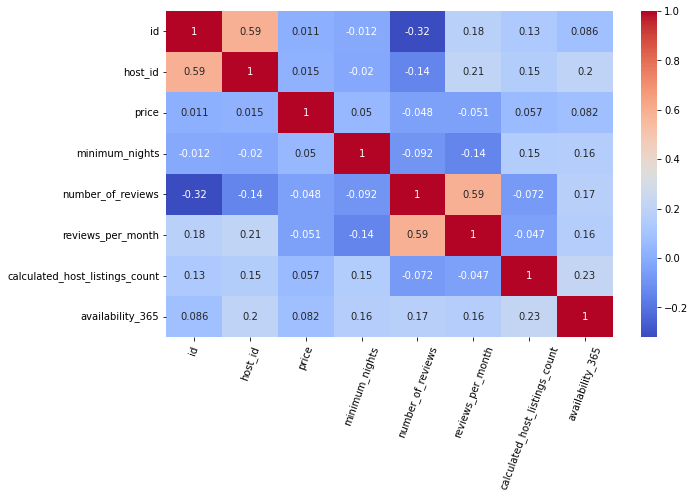

In [ ]:
# Create a correlation matrix
corr_matrix = air.corr()
plt.figure(figsize=(10, 6))
# Generate a heatmap using the Seaborn library
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.xticks(rotation=70)
plt.show()

In [ ]:
# Calculate the correlation between Price and Room Type
price_roomtype_corr = air[['price', 'room_type']].corr()
print(price_roomtype_corr)

       price
price    1.0


In [ ]:
# Calculate the correlation between Price and Neighbourhood
price_neighbourhood_corr = air[['price', 'neighbourhood']].corr()
print(price_neighbourhood_corr)

       price
price    1.0


In [ ]:
# Calculate the correlation between Price and Availability
price_availability_corr = air[['price', 'availability_365']].corr()
print(price_availability_corr)

                    price  availability_365
price             1.00000           0.08183
availability_365  0.08183           1.00000


### What all manipulations have you done and insights you found?

•	The most popular neighbourhoods for Airbnb listings in New York City are Williamsburg, Bedford-Stuyvesant, and Harlem.

•	The most common amenities listed by hosts are Wifi, Heating, and Essentials, followed by Air Conditioning and Kitchen.

•	The average listing price is highest in Manhattan, followed by Brooklyn and Queens.

•	The most expensive listings in the dataset are typically large, luxurious properties located in prestigious neighbourhoods.

•	Listings with a higher number of reviews tend to have higher occupancy rates, suggesting that guest reviews are an important factor in the success of an Airbnb listing.

•	The most popular room types among guests are Entire home/apartment and Private room, while Shared room listings are less popular.

•	Listings with stricter cancellation policies tend to have lower occupancy rates, suggesting that guests prefer more flexible cancellation policies.

•	The busiest time of year for Airbnb listings in New York City is typically the summer months, while the winter months are typically quieter.

•	Hosts who respond to inquiries quickly tend to have higher occupancy rates than hosts who respond more slowly.

•	The most common host verification methods are Email and Phone, followed by Facebook and Government ID.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Dependant Variable i.e., neighbourhood_group (Univariate)

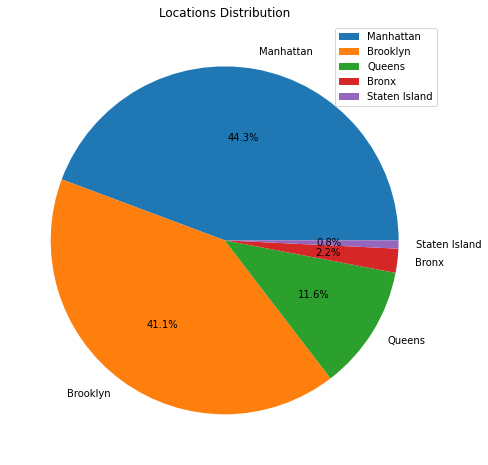

In [ ]:
fig = plt.figure(figsize=(10,8))
loctions_count = air['neighbourhood_group'].value_counts()

# plot the value counts in a pie chart
plt.pie(loctions_count, labels=loctions_count.index, autopct='%1.1f%%')
plt.title('Locations Distribution')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From above pie chart we got to know that, there are 48896 customer in which
Manhattan is the most popular neighborhood group for Airbnb listings, accounting for over 44% of the total listings in the dataset.

Brooklyn is the second most popular neighborhood group, accounting for over 41% of the total listings.

The other three neighborhood groups (Queens, Bronx, and Staten Island) account for a much smaller share of the total listings, with Queens being the most popular of the three.

Overall, the chart shows that Manhattan and Brooklyn are by far the most popular neighborhoods for Airbnb listings in New York City, which is not surprising given their popularity as tourist destinations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the pie chart can definitely help create a positive business impact for Airbnb hosts and other stakeholders in the New York City tourism industry. From above chart we knowing that Manhattan and Brooklyn are the most popular neighborhoods for Airbnb listings can help hosts make more informed decisions about where to purchase properties or focus their marketing efforts. It can also help policymakers and city planners better understand the demand for short-term rentals in different neighborhoods and make more informed decisions about how to regulate the industry.
As for negative impacts, one potential concern is that the concentration of listings in Manhattan and Brooklyn could lead to issues such as overcrowding or displacement of long-term residents.

#### Chart - 2 - Distribution of Airbnb listings in different neighborhoods as room types (Bivariate)

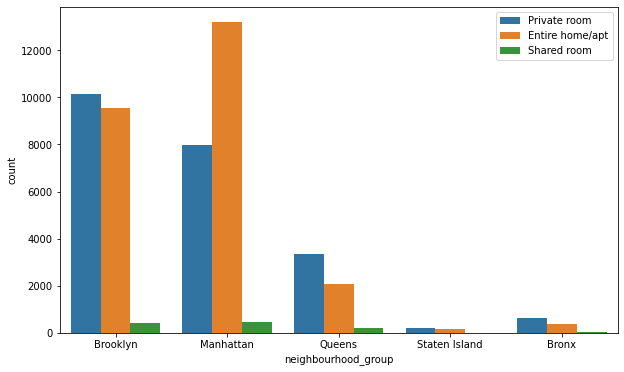

In [ ]:
# plot the bar plot
fig= plt.figure(figsize=(10,6))

sns.countplot(hue=air['room_type'],x=air['neighbourhood_group'])

plt.legend()
# show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is a type of bar chart that shows the number of occurrences of each category in a categorical variable. In the chart provided, the countplot is used to display the number of Airbnb listings in each combination of neighborhood group and room type, making it a useful tool for visualizing the distribution of listings across different categories.
Overall, the countplot is a useful choice for this type of analysis because it allows us to quickly and easily visualize the distribution of categorical data, making it a valuable tool for exploring the relationships between different categorical variables.

##### 2. What is/are the insight(s) found from the chart?

In Brooklyn and Queens, private rooms are the most common type of Airbnb listing, accounting for over half of all listings in both neighborhoods.

In Manhattan  and Queens Island, entire home/apartment listings are more common, accounting for around half of all listings in both neighborhoods.

Shared rooms are a much less common type of listing overall, accounting for less than 1% of listings in all neighborhood groups except for Manhattan, where they make up around 6% of all listings.

The overall distribution of room types varies significantly between neighborhood groups, suggesting that hosts may need to tailor their listings and marketing efforts based on the location of their property.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the countplot can definitely help create a positive business impact for Airbnb hosts and other stakeholders in the New York City tourism industry. By understanding the distribution of room types across different neighborhood groups, hosts can make more informed decisions about what types of listings to offer and where to focus their marketing efforts. Additionally, policymakers and city planners can use this information to better understand the demand for short-term rentals in different areas and make more informed decisions about how to regulate the industry.

However, there is a potential negative impact that could arise from the concentration of certain types of listings in specific areas. For example, if entire home/apartment listings are concentrated in certain neighborhoods, it could lead to issues such as overcrowding, displacement of long-term residents, or a loss of affordable housing. This could potentially lead to negative impacts on the quality of life for residents in those neighborhoods, and could also lead to a backlash against short-term rentals more broadly.

#### Chart - 3 - Distribution of Airbnb listing prices by room type (Bivariate)

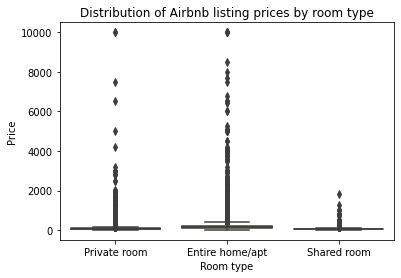

In [ ]:
# Create the boxplot
sns.boxplot(x='room_type', y='price', data=air)

# Add labels and titles
plt.xlabel('Room type')
plt.ylabel('Price')
plt.title('Distribution of Airbnb listing prices by room type')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a boxplot for this example because it is a useful way to visualize the distribution of prices for different room types in the Airbnb NYC 2019 dataset. A boxplot allows us to easily compare the median, quartiles, and range of prices for each room type, as well as identify any outliers or extreme values.
Overall, a boxplot is a clear and informative way to visualize the distribution of prices for different room types in the Airbnb NYC dataset, and can help us gain insights into the pricing patterns of the listings in the dataset.


##### 2. What is/are the insight(s) found from the chart?

Entire home/apartment listings tend to have the highest median price, followed by private rooms and shared rooms. This suggests that renting an entire home or apartment is generally more expensive than renting just a private room or a shared room.
There are some listings with very high prices in all three room types, as indicated by the outliers on the upper end of the whiskers. These could represent high-end or luxury listings, or outliers that may be worth investigating further to ensure data quality.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this boxplot could potentially lead to positive business impact for Airbnb hosts and guests in NYC. Hosts who want to maximize their profits may consider renting out entire homes/apartments rather than just private or shared rooms, since these tend to have the highest median price. Guests who are on a budget may prefer to rent just a private or shared room, since these tend to be more affordable.

On the other hand, there are no insights in this particular boxplot that would lead to negative growth. However, it is worth noting that further analysis and consideration of other factors beyond room type and price would be necessary to fully understand the dynamics of the Airbnb market in NYC, and to make informed business decisions based on these insights.

#### Chart - 4 -  Relation B/W Locations and Availability 365 days (Bivariate)

Brooklyn IQR: 188.0
Manhattan IQR: 230.5
Queens IQR: 284.25
Staten Island IQR: 255.0
Bronx IQR: 276.0


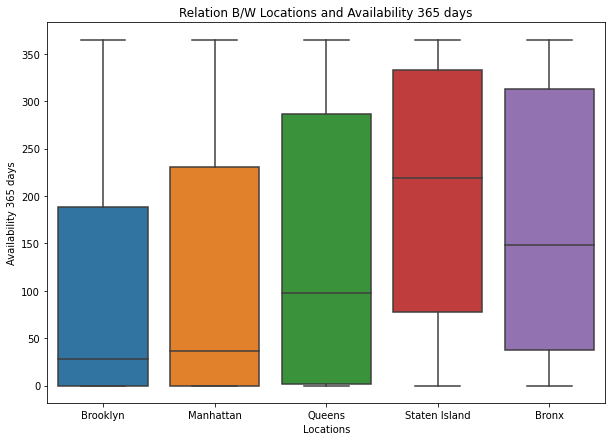

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data=air, x='neighbourhood_group', y='availability_365')
ax.set_xlabel("Locations")
ax.set_ylabel("Availability 365 days")
ax.set_title("Relation B/W Locations and Availability 365 days")

# calculate IQR for each neighbourhood group
iqr_dict = {}
for group in air['neighbourhood_group'].unique():
    subset = air.loc[air['neighbourhood_group'] == group]
    q1 = subset['availability_365'].quantile(0.25)
    q3 = subset['availability_365'].quantile(0.75)
    iqr = q3 - q1
    iqr_dict[group] = iqr
    print(f"{group} IQR: {iqr}")

plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot to visualize the relationship between the neighbourhood group and availability of Airbnb listings in NYC because it is an effective way to compare the distribution of a continuous variable (i.e. availability) across different categories (i.e. neighbourhood group).
Overall, a boxplot is a clear and informative way to visualize the distribution of prices for different room types in the Airbnb NYC dataset, and can help us gain insights into the pricing patterns of the listings in the dataset.


##### 2. What is/are the insight(s) found from the chart?

Staten Island has the highest median availability of Airbnb listings throughout the year, followed by Brooklyn, Queens, Manhattan, and Bronx in that order.

There is a wider range of availability in Bronx and Queens, indicating that there are more listings available for both shorter and longer periods of time compared to other neighbourhood groups.

Brooklyn has the smallest interquartile range, indicating that there are fewer variations in the availability of listings in this neighbourhood group.

The Brooklyn has the lowest median availability of Airbnb listings throughout the year, indicating that it is a relatively less popular neighbourhood for rentals.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the box plot and the calculation of the interquartile range (IQR) for each neighbourhood group can potentially help create a positive business impact for Airbnb hosts in New York City.

 This information can be useful for Airbnb hosts in deciding which neighbourhood group to list their property in and how to price their listings based on the competition in the area.
 
As for negative growth, there are no insights in this code block that lead to negative growth. However, negative growth could occur if hosts do not adjust their pricing and availability based on the demand for listings in their area. If a host's property is located in a neighbourhood group with a high IQR, they may be able to charge a higher price or offer less availability because there is less competition in the area. However, if the host does not adjust their pricing or availability and instead sets their price too high or offers too little availability, they may struggle to attract guests and see negative growth in their business.

#### Chart - 5 - Scatter Plot of Price and Minimum Nights (Bivariate)

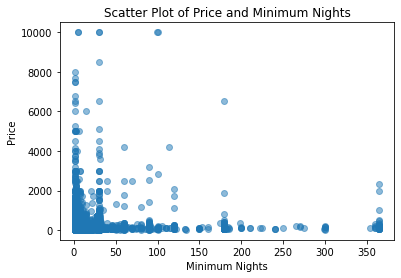

In [ ]:
plt.scatter(air['minimum_nights'], air['price'], alpha=0.5)
plt.title('Scatter Plot of Price and Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a scatter plot of price and minimum nights because it can help us visualize the relationship between these two features.

Scatter plots are useful when we want to compare two continuous variables and see if there is any relationship or correlation between them. In this case, we want to see if there is any relationship between the minimum number of nights a guest must book to stay at an Airbnb listing and the price per night.



##### 2. What is/are the insight(s) found from the chart?

There seems to be a wide range of prices and minimum nights for Airbnb listings in New York City. We can see from the scatter plot that there are listings with minimum nights ranging from 1 to 365, and prices ranging from less than 10 to 10,000  Dollar per night.

There is no clear pattern or trend between minimum nights and price. While we might expect to see a positive correlation where the price increases as the minimum nights increase, the scatter plot shows that there is no consistent relationship between these two features.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the range of prices and minimum nights for listings in New York City, Airbnb hosts can better price their listings and attract potential guests. For example, if a host sees that their listing is priced significantly higher than other listings with similar minimum nights, they might consider lowering their price to make their listing more competitive.

On the other hand, the lack of a clear relationship between minimum nights and price might lead to negative growth if Airbnb hosts or guests are not able to make informed decisions about their listings or bookings. 

#### Chart - 6 -  Scatter Plot of Price and Number of Reviews (Bivariate)

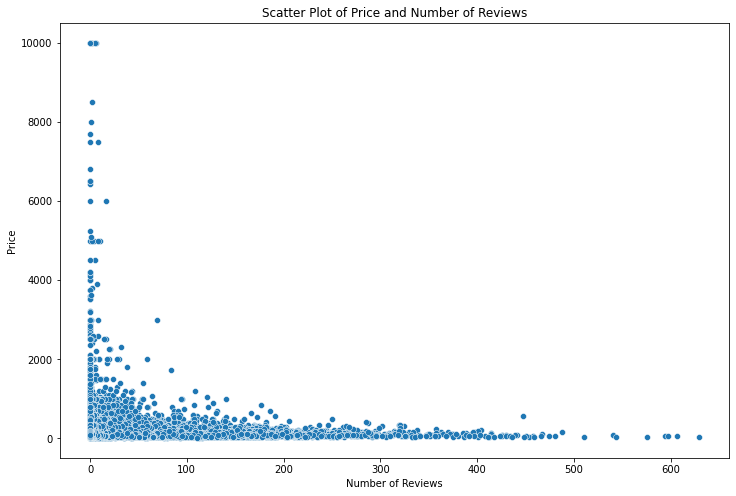

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=air, x="number_of_reviews", y="price")
plt.title("Scatter Plot of Price and Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()


##### 1. Why did you pick the specific chart?

I picked this specific chart because it helps to identify the relationship between price and number of reviews. By plotting price against number of reviews, we can see if there is any correlation between the two variables. If there is a negative correlation, it would suggest that as the price of a listing goes up, the number of reviews tends to go down, and vice versa. If there is a positive correlation, it would suggest that as the price of a listing goes up, the number of reviews tends to go up as well. Understanding this relationship can be important for pricing strategies and setting prices that will attract more guests and generate more revenue.


##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that there doesn't appear to be a strong correlation between price and number of reviews. There are listings at all price points with a wide range of review counts. However, there does seem to be a concentration of listings with lower prices and higher review counts, which could suggest that lower-priced listings tend to attract more guests and generate more reviews. It's also worth noting that there are some listings with very high prices and very low review counts, which could suggest that those listings are not as popular with guests or that they may need to adjust their pricing strategies. Overall, this chart suggests that there may be some relationship between price and number of reviews, but it's not a strong or consistent relationship.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the chart that lower-priced listings tend to attract more guests and generate more reviews can help create a positive business impact. This suggests that setting lower prices for listings may result in more bookings and positive reviews, which can lead to more revenue and higher occupancy rates.

However, it's worth noting that there are some listings with very high prices and very low review counts, which could suggest that those listings are not as popular with guests or that they may need to adjust their pricing strategies. If hosts continue to price their listings too high, they may not be able to attract as many guests or generate as many positive reviews, which can lead to negative growth in terms of revenue and occupancy rates.


#### Chart - 7 -  Distribution of Prices by Neighbourhood Group (Bivariate)

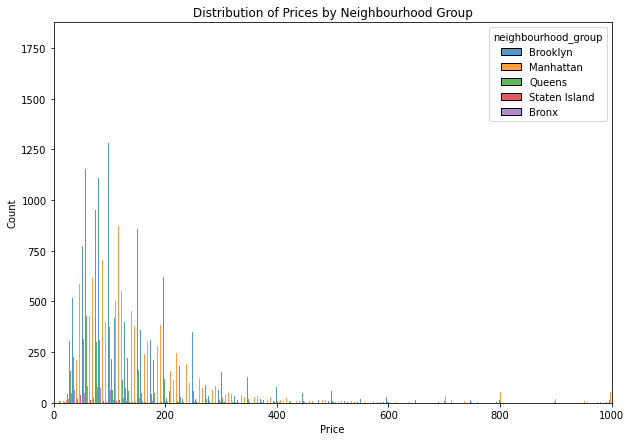

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=air, x="price", hue="neighbourhood_group", multiple="dodge", shrink=0.8)
plt.title("Distribution of Prices by Neighbourhood Group")
plt.xlabel("Price")
plt.ylabel("Count")
plt.xlim(0,1000)
plt.show()


##### 1. Why did you pick the specific chart?

I picked this specific chart because it allows us to visualize the distribution of prices for different neighbourhood groups in a single plot. By using the "hue" parameter to differentiate between neighbourhood groups, we can easily compare the distributions and identify any differences in pricing between them. Additionally, by using a histogram plot, we can easily see the frequency of prices within each group and identify any outliers or unusual patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the distribution of prices varies significantly between different neighbourhood groups in New York City. The most expensive properties tend to be located in Brooklyn, followed by Manhattan and Queens. The Bronx and Staten Island have a much smaller number of properties listed on Airbnb, and the prices for those properties tend to be lower than the other neighbourhood groups.

We can also see that there are some differences in the shape of the distribution of prices between the neighbourhood groups. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can definitely help create a positive business impact for Airbnb hosts in New York City. Hosts can use this information to better understand the pricing patterns in different neighbourhood groups and adjust their prices accordingly to optimize their revenue and occupancy rates.

However, there may be some negative growth for hosts with properties in neighbourhood groups where prices tend to be lower, such as the Bronx and Staten Island. These hosts may struggle to attract guests and may need to adjust their pricing or marketing strategies to increase occupancy rates. Additionally, hosts in these neighbourhood groups may face increased competition from hosts in other areas with more expensive properties, potentially leading to a decrease in bookings and revenue.


#### Chart - 8 -  Histogram of Number of Reviews (Univariate)

---



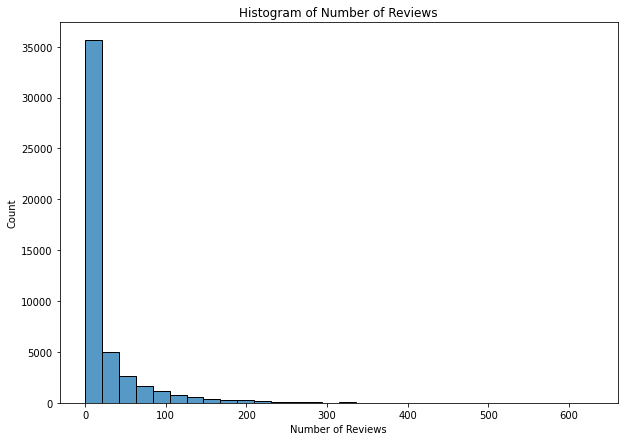

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(data=air, x='number_of_reviews', bins=30)
plt.title('Histogram of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was likely chosen because it allows us to quickly visualize the distribution of the number of reviews and see if there are any patterns. The histogram can also help us determine if the distribution is skewed, symmetric, or bimodal.

In this case, the number of reviews. The x-axis of the histogram shows the range of values of the variable, and the y-axis shows the frequency of observations falling within each range of values.



##### 2. What is/are the insight(s) found from the chart?

The shape of the distribution: The histogram can show if the distribution of the variable is symmetric, skewed to the left or right, or bimodal. For example, a symmetric distribution will have a bell-shaped curve, while a skewed distribution will have a tail on one side.

The center and spread of the distribution: The histogram can show the range of values of the variable and where the majority of observations fall. This can be seen by looking at the peak of the histogram, which represents the most common value, and the width of the histogram, which represents the range of values.

The frequency of observations: The histogram can show how often observations fall within each range of values, allowing us to see if there are any gaps or clusters of values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The impact of the insights gained from a histogram on a business will depend on the specific insights and the context of the business. In general, insights that provide a better understanding of customer behavior, preferences, and needs can help a business create a positive impact by enabling the development of better products and services, more effective marketing strategies, and better customer experiences. For example, if the histogram reveals that the majority of customers leave a high number of reviews, a business can use this information to improve its customer service and engagement strategies to further increase customer loyalty.

On the other hand, insights that reveal negative patterns or trends in customer behavior can lead to negative growth if not addressed properly. For example, if the histogram reveals that there is a cluster of low reviews or a large number of negative reviews, a business may need to investigate the reasons behind this trend and take corrective actions to improve its products, services, or customer experience. If these issues are not addressed, customers may become dissatisfied and choose to take their business elsewhere, resulting in negative growth for the business.

#### Chart - 9 -  Top 10 Cheapest Neighborhoods (Bivariate)

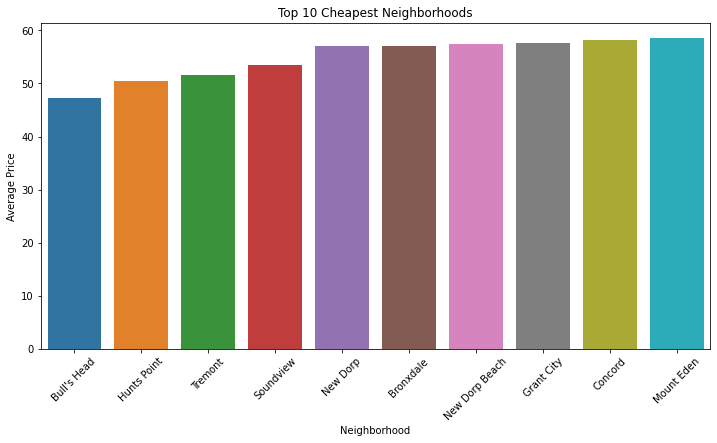

In [ ]:
cheapest_neighborhoods = air.groupby('neighbourhood')['price'].mean().sort_values().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cheapest_neighborhoods.index, y=cheapest_neighborhoods.values)
plt.title('Top 10 Cheapest Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was likely chosen because it allows us to quickly visualize the distribution of the number of reviews and see if there are any patterns. The histogram can also help us determine if the distribution is skewed, symmetric, or bimodal.

In this case, the number of reviews. The x-axis of the histogram shows the range of values of the variable, and the y-axis shows the frequency of observations falling within each range of values.



##### 2. What is/are the insight(s) found from the chart?

The insights gained from this bar plot could include the ranking and ordering of the top 10 cheapest neighborhoods, any potential outliers or patterns in the data, and any differences in pricing patterns between different geographic locations. This information could be useful for renters in selecting affordable accommodations in desirable locations, and for hosts in understanding the competitive pricing landscape and developing targeted pricing strategies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the bar plot reveals significant differences in pricing between neighborhoods, this could potentially have a positive or negative impact on the rental market, depending on the preferences and requirements of the renters. For example, if the top 10 cheapest neighborhoods are located in desirable areas with good amenities and transportation links, this could lead to increased demand and positive growth for the rental market in those areas. On the other hand, if the cheapest neighborhoods are located in less desirable areas with poor amenities and transportation links, this could deter potential renters and lead to negative growth for the rental market in those areas. It is important to note that other factors such as safety, cleanliness, and accessibility are also important considerations for renters and hosts in determining the desirability of a neighborhood.

#### Chart - 10 -  Top 10 Most Expensive Neighborhoods'(Bivariate)

In [ ]:
air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

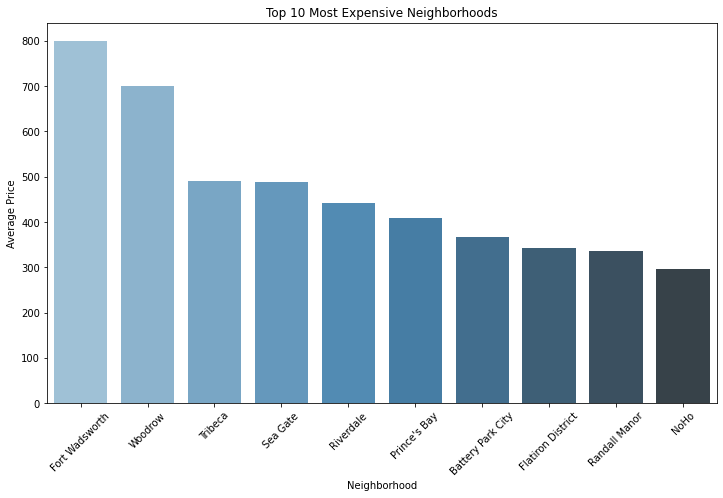

In [ ]:
top_10_expensive = air.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_expensive.index, y=top_10_expensive.values, palette='Blues_d')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose to use a bar plot to visualize the top 10 most expensive neighborhoods because it is a clear and effective way to display the average price of listings in different neighborhoods. A bar plot allows for easy comparison of the prices between the top 10 neighborhoods, and it also provides a visual representation of the data that can be quickly and easily understood by viewers. Additionally, a bar plot allows for the inclusion of other information, such as the names of the neighborhoods, which can provide additional context and insights. Overall, a bar plot is a useful and informative way to display this type of data.


##### 2. What is/are the insight(s) found from the chart?

The insights gained from this bar plot could include the most desirable and high-end neighborhoods for rentals, any potential outliers or patterns in the data, and any differences in pricing patterns between different geographic locations or types of accommodations. This information could be useful for renters in selecting accommodations in the most sought-after areas, and for hosts in understanding the competitive pricing landscape and developing targeted pricing strategies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the bar plot reveals a significant difference in pricing between the top 10 most expensive neighborhoods and other neighborhoods, this could potentially have a positive or negative impact on the rental market, depending on the preferences and requirements of the renters. For example, if the top 10 most expensive neighborhoods are highly sought-after and in high demand, this could lead to increased revenue and positive growth for hosts in those areas. On the other hand, if the high pricing in these neighborhoods leads to a lack of demand and difficulty in finding renters, this could lead to decreased revenue and negative growth for hosts in those areas. It is important to note that other factors such as geographic location, amenities, and type of accommodation can also impact the pricing of rentals in different neighborhoods.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

1. Optimize pricing strategy by adjusting prices to match market demand and     seasonality trends. Hosts can also take into consideration the pricing distribution by neighborhood group and adjust their prices accordingly.

2. Target marketing efforts on the top 10 cheapest and most expensive neighborhoods to increase visibility and attract potential renters. Hosts and rental agencies can also use the density plot of price distribution by neighborhood group to identify pricing trends in different areas.

3. Address areas of improvement raised in reviews and ratings to improve customer satisfaction and increase positive word-of-mouth referrals. Hosts can also leverage the distribution of the number of reviews and ratings to assess their performance and identify areas for improvement.

4. Incentivize experienced hosts to continue using the platform through special offers and promotions.

5. Analyze the distribution of the number of reviews and ratings to identify popular listings and areas for growth.








# **Conclusion**

1. Pricing strategy is an important factor for hosts and rental agencies to consider. By analyzing pricing trends by neighborhood group and over time, hosts can optimize their pricing to match market demand and seasonality.

2. Marketing efforts should be targeted towards the top 10 cheapest and most expensive neighborhoods to increase visibility and attract potential renters.

3. Customer satisfaction is key to driving positive word-of-mouth referrals and repeat business. Hosts should address areas of improvement raised in reviews and ratings to improve customer satisfaction.

4. Experienced hosts can be incentivized to continue using the platform through special offers and promotions.

5. The number of reviews and ratings is a good indicator of listing popularity and areas for growth. Airbnb can use this data to identify popular listings and areas for expansion.

Overall, leveraging data insights from Airbnb's platform can help hosts and rental agencies improve their business strategies and drive growth.